In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

# LOAD DATA

In [2]:
train = pd.read_csv('./Data/train_clean.csv') 

In [3]:
train.head()

,Unnamed: 0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhenSold,YrsSinceRemodel
0,0,0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,...,NoFence,None,0,2,2008,WD,Normal,208500,5,5
1,1,1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,...,NoFence,None,0,5,2007,WD,Normal,181500,31,31
2,2,2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,...,NoFence,None,0,9,2008,WD,Normal,223500,7,6
3,3,3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,...,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36
4,4,4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,...,NoFence,None,0,12,2008,WD,Normal,250000,8,8


In [4]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('index', axis=1)

In [5]:
# I have to do this again
# Ensure these variabes are categorical
train['MSSubClass'] = train['MSSubClass'].astype(str)
train['OverallQual'] = train['OverallQual'].astype(str)
train['OverallCond'] = train['OverallCond'].astype(str)

train['MoSold'] = train['MoSold'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)
train['YearBuilt'] = train['YearBuilt'].astype(str)
      
train['YearRemodAdd'] = train['YearRemodAdd'].astype(str)
train['GarageYrBlt'] = train['GarageYrBlt'].astype(str)

In [6]:
train.shape[0]

1453

In [7]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhenSold,YrsSinceRemodel
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,NoFence,None,0,2,2008,WD,Normal,208500,5,5
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,NoFence,None,0,5,2007,WD,Normal,181500,31,31
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,NoFence,None,0,9,2008,WD,Normal,223500,7,6
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,NoFence,None,0,12,2008,WD,Normal,250000,8,8


In [9]:
# train.info()

# The Variables

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train.select_dtypes(include=numerics)
numlist = list(num_train)
print(len(numlist),' numerical variables')
print(list(numlist))

32  numerical variables
['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeWhenSold', 'YrsSinceRemodel']


In [11]:
cattypes = ['O']
cat_train = train.select_dtypes(include=cattypes)
catlist_all = list(cat_train)
print(len(catlist_all),' categorical variables')
print(catlist_all)

51  categorical variables
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


# Preprocessing 

#### 1. Separate the input and output variable(s): create new dataframes

In [12]:
# Remove 'SalePrice' and 'Id' from the numlist
numlist.remove('SalePrice')
numlist.remove('Id')

print(len(numlist),' numerical variables')
print(numlist)

30  numerical variables
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeWhenSold', 'YrsSinceRemodel']


In [13]:
# Let's reduce the list of categorical variables
# For each variable, running an anova to determine 
      # if there is a significant difference in mean SalePrice 
      #  between the differenct options of the given variable
        
import statsmodels.api as sm
from statsmodels.formula.api import ols

catlist = list()

for cvar in catlist_all: 
    # Group Difference
    mstr = 'SalePrice ~ ' + cvar
    mod = ols(mstr,data=train).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    if aov_table['PR(>F)'][0] <= 0.01:
        catlist.append(cvar)

print('Original list had ', len(catlist_all),' categorical variables')
print('Reduced list has ', len(catlist),' categorical variables \n')
print(catlist)

Original list had  51  categorical variables
Reduced list has  44  categorical variables 

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']


In [14]:
#catlist = ['ExterQual', 'BsmtQual', 'KitchenQual',
#          'Neighborhood', 'MSZoning','BsmtCond',
#          'CentralAir','PoolQC'] # testing

In [15]:
# CONCATENATE!! the numerical and categorical
inputs_vars = numlist + catlist
print(inputs_vars)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeWhenSold', 'YrsSinceRemodel', 'MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 

In [16]:
PriceFeatures = train[inputs_vars].copy()

In [17]:
PriceFeatures.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,Attchd,2003.0,RFn,TA,TA,Y,NoPool,NoFence,WD,Normal
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,Attchd,1976.0,RFn,TA,TA,Y,NoPool,NoFence,WD,Normal
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,Attchd,2001.0,RFn,TA,TA,Y,NoPool,NoFence,WD,Normal
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,Detchd,1998.0,Unf,TA,TA,Y,NoPool,NoFence,WD,Abnorml
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,Attchd,2000.0,RFn,TA,TA,Y,NoPool,NoFence,WD,Normal


##### Which Columns Are Numeric? Need this information later.

In [18]:
nlist = list(PriceFeatures.select_dtypes('number'))
print('Numerical Column Names: \n', nlist)

num_indx = []
for nvar in nlist:
    num_indx.append(PriceFeatures.select_dtypes('number').columns.get_loc(nvar))
    
print('\nNumerical Columns Indices: \n', num_indx)

Numerical Column Names: 
 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeWhenSold', 'YrsSinceRemodel']

Numerical Columns Indices: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


##### The Dependent Variable 🎯

In [19]:
Price = train['SalePrice']

In [20]:
log_Price = np.log(train['SalePrice'])

SalePrice is right skewed (left plot).
For the output/dependent variable, the log of SalePrice taken.
This is so the residuals of a linear model would be normal.


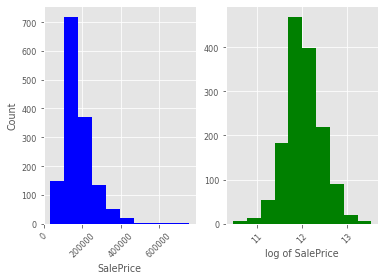

In [21]:
fig, axs = plt.subplots(1,2)   
axs[0].hist(Price,color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('SalePrice')
    
axs[1].hist(log_Price,color='g')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('log of SalePrice')
print('SalePrice is right skewed (left plot).')
print('For the output/dependent variable, the log of SalePrice taken.')
print('This is so the residuals of a linear model would be normal.')

#### 2. Dummify the Categorical Variables

In [22]:
col_2_dummy = catlist
PriceFeatures = pd.get_dummies(PriceFeatures, 
                               columns=col_2_dummy, 
                               drop_first=True)

In [23]:
PriceFeatures.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


#### 3. Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    PriceFeatures, log_Price, test_size=0.2, 
    random_state=0)

In [25]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
528,0.0,32668,0.0,1219,0,816,2035,2515,0,0,...,0,0,0,0,1,0,1,0,0,0
186,0.0,9947,0.0,611,0,577,1188,1217,0,0,...,0,0,0,0,1,0,0,0,1,0
156,60.0,7200,0.0,0,0,0,0,1040,0,0,...,0,0,0,0,1,0,0,0,1,0
312,65.0,7800,0.0,507,0,286,793,793,325,0,...,0,0,0,0,1,0,0,0,1,0
8,51.0,6120,0.0,0,0,952,952,1022,752,0,...,0,0,0,0,1,0,0,0,0,0


#### 4. Standardize the numerical variables

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

t = [('num', StandardScaler(), num_indx)]
transf = ColumnTransformer(transformers=t,
                           remainder='passthrough')

In [27]:
X_train_scaled = transf.fit_transform(X_train)
X_test_scaled = transf.transform(X_test)

In [28]:
X_train_scaled.shape

(1162, 537)

In [29]:
# # plotting the standardized numerical variables vs.
#      # log of SalePrice
    
# import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

# # correlation threshold, used to highlight particular figures 
# corr_thrshld = 0.4

# fcnt = 0
# for Feat in X_train.columns[num_indx]:
#     fig, axs = plt.subplots(1,2) 
#     x = X_train_scaled[:,fcnt]
#     y = y_train
    
#     axs[0].scatter(x,y,color='b')
#     axs[0].set_xlabel('standardized ' + Feat,fontsize = 8)
#     axs[0].set_ylabel('log of SalePrice')
#     fcnt +=1
    
#     r = ma.corrcoef(ma.masked_invalid(x), 
#                 ma.masked_invalid(y))
    
#     if np.abs(r[0,1]) >= corr_thrshld:
#         axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
#         axs[0].set_facecolor('#8ce68c')
        
#     elif np.abs(r[0,1]) < corr_thrshld:
#         axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        
    
#     # Histogram
#     axs[1].hist(x,color='b')
#     axs[1].tick_params(axis='x', rotation=45)
#     axs[1].set_ylabel('Count')
#     axs[1].set_xlabel('standardized ' + Feat,fontsize = 8)

In [30]:
# initializing these variables for model comparision
rsqrd_train = []
rsqrd_test = []
rmse_log_train = []
rmse_log_test = []
rmse_train = []
rmse_test = []

# Baseline Model

In [31]:
# Predicting the mean of the dependent variable
y_pred_baseline = log_Price.mean()
print('Y Average: ', y_pred_baseline)

Y Average:  12.02384804121878


In [32]:
y_predTrain_baseline = [y_pred_baseline]*len(y_train)
y_predTest_baseline = [y_pred_baseline]*len(y_test)

##### Baseline Model ➡ Evaluation

RMSE Logarithmic Train:  0.3965012072347906
RMSE Logarithmic Test:  0.41245190128513093
RMSE Train: $ 80205.2282629984
RMSE Test: $ 83041.87738343504


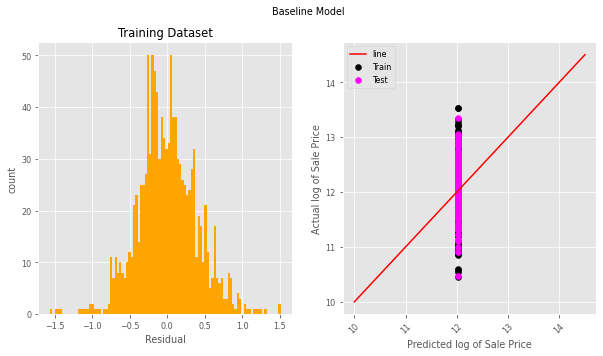

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_baseline_train = mean_squared_error(y_train, 
                                         y_predTrain_baseline, 
                                         squared = False)
rmse_baseline_test = mean_squared_error(y_test, 
                                         y_predTest_baseline, 
                                         squared = False)
print('RMSE Logarithmic Train: ', rmse_baseline_train)
print('RMSE Logarithmic Test: ', rmse_baseline_test)

# untransforming 
rmse_baseline_train_conv = mean_squared_error(np.exp(y_train), 
                                         np.exp(y_predTrain_baseline), 
                                         squared = False)
rmse_baseline_test_conv = mean_squared_error(np.exp(y_test), 
                                         np.exp(y_predTest_baseline), 
                                         squared = False)
print('RMSE Train: $', rmse_baseline_train_conv)
print('RMSE Test: $', rmse_baseline_test_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_baseline_train = y_train - y_predTrain_baseline
residuals_baseline_test = y_test - y_predTest_baseline

axs[0].hist(residuals_baseline_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(y_predTrain_baseline, 
         y_train, color='k')
axs[1].scatter(y_predTest_baseline, 
         y_test, color='magenta')

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('Baseline Model');

In [34]:
rsqrd_train.append(r2_score(y_train, y_predTrain_baseline))
rsqrd_test.append(r2_score(y_test, y_predTest_baseline))
rmse_log_train.append(rmse_baseline_train)
rmse_log_test.append(rmse_baseline_test)
rmse_train.append(rmse_baseline_train_conv)
rmse_test.append(rmse_baseline_test_conv)

# Model 1 : Multiple Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
print('R^2 for train is equal to %.3f' %(lm.score(X_train_scaled, y_train)))
print('R^2 for test is equal to %.3f' %(lm.score(X_test_scaled, y_test)))

R^2 for train is equal to 0.961
R^2 for test is equal to -192765241808766272.000


##### Multiple Linear Regression Model ➡ Evaluation

In [36]:
#import warnings
##suppress warnings
#warnings.filterwarnings('ignore')

#np.exp(lm.predict(X_test_scaled))

RMSE Logarithmic Train:  0.07842537705507167
RMSE Logarithmic Test:  181086892.73055336
RMSE Train: $ 16558.456639942913


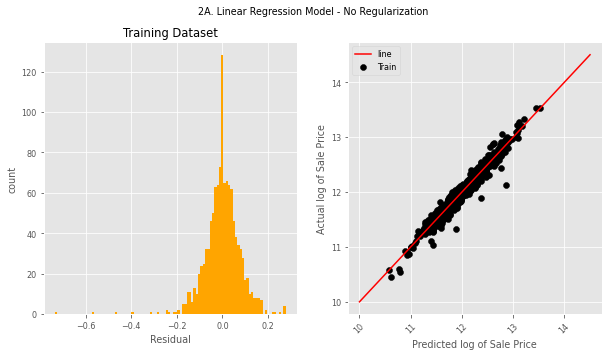

In [37]:
from sklearn.metrics import mean_squared_error
rmse_lm_train = mean_squared_error(y_train, 
                                lm.predict(X_train_scaled), 
                                squared = False)
rmse_lm_test = mean_squared_error(y_test, 
                                lm.predict(X_test_scaled), 
                                squared = False)

print('RMSE Logarithmic Train: ', rmse_lm_train)
print('RMSE Logarithmic Test: ', rmse_lm_test)

# untransforming 
rmse_lm_train_conv = mean_squared_error(np.exp(y_train), 
                                np.exp(lm.predict(X_train_scaled)), 
                                squared = False)
#rmse_lm_test_conv = mean_squared_error(np.exp(y_test), 
#                                np.exp(lm.predict(X_test_scaled)), 
#                                squared = False)

print('RMSE Train: $', rmse_lm_train_conv)
#print('RMSE Test: $', rmse_lm_test_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_lm_train = y_train - lm.predict(X_train_scaled)
residuals_lm_test = y_test - lm.predict(X_test_scaled)

axs[0].hist(residuals_lm_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(lm.predict(X_train_scaled), 
         y_train, color='k')
#axs[1].scatter(lm.predict(X_test_scaled), 
#         y_test, color='magenta') # OVERFITTED

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('2A. Linear Regression Model - No Regularization');

In [38]:
rsqrd_train.append(r2_score(y_train, lm.predict(X_train_scaled)))
rsqrd_test.append(r2_score(y_test, lm.predict(X_test_scaled)))
rmse_log_train.append(rmse_lm_train)
rmse_log_test.append(rmse_lm_test)
rmse_train.append(rmse_lm_train_conv)
rmse_test.append(np.nan)

In [39]:
pd.Series(lm.coef_, index=X_train.columns)

LotFrontage             -3.102878e-03
LotArea                  1.186756e-02
MasVnrArea              -6.933046e-04
BsmtFinSF1               5.527466e+10
BsmtFinSF2               1.862679e+10
                             ...     
SaleCondition_AdjLand    2.129506e-01
SaleCondition_Alloca    -7.705688e-04
SaleCondition_Family    -1.717186e-02
SaleCondition_Normal     7.884216e-02
SaleCondition_Partial   -1.890020e-01
Length: 537, dtype: float64

# Model 2A : Lasso - No Grid Search 

Identifying a range of lambdas to look at in the following grid search.

In [40]:
from sklearn.linear_model import Lasso
lasso  = Lasso()
lasso.set_params(normalize=False)
lasso_scores_train = []
lasso_scores_test  = []

alphas = np.linspace(0.0001,0.01,100)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train_scaled, y_train)  
        coefs_lasso.append(lasso.coef_)
        
        lasso_scores_train.append(lasso.score(X_train_scaled, y_train))
        lasso_scores_test.append(lasso.score(X_test_scaled, y_test))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = PriceFeatures.columns)  
# coefs_lasso.head()

In [41]:
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

lambda =  0.0007000000000000001


Text(0, 0.5, '$R^2$')

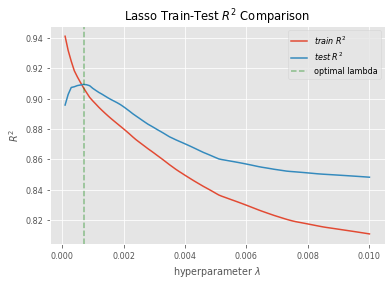

In [42]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')

lasso_underfit = lasso_scores_train < lasso_scores_test
first_underfit  = np.min(alphas[lasso_underfit])
print('lambda = ', first_underfit)
plt.axvline(first_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)

plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

# Model 2B : Lasso - Grid Search

In [43]:
from sklearn.linear_model import Lasso

# Grid Search 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

skfold = KFold(n_splits=3, shuffle=True, random_state=0)
lasso_gs  = Lasso()
lasso_gs.set_params(normalize=False)

params = {
    "alpha": [0.0005, 0.0007, 0.0008, 0.0009, 0.001, 0.003, 
              0.005, 0.007, 0.009, 0.10]
}

gs = GridSearchCV(lasso_gs, params, scoring = 'r2', cv=skfold)
gs.fit(X_train_scaled, y_train)
gs.cv_results_['mean_test_score']

array([0.83540023, 0.83972819, 0.84055117, 0.84077811, 0.84052002,
       0.81537491, 0.79646958, 0.78609855, 0.77941268, 0.64232147])

In [44]:
gs.best_estimator_

Lasso(alpha=0.0009)

RMSE Logarithmic Train:  0.12493170664482887
RMSE Logarithmic Test:  0.12481834525600936
RMSE Train: $ 29570.30480188961


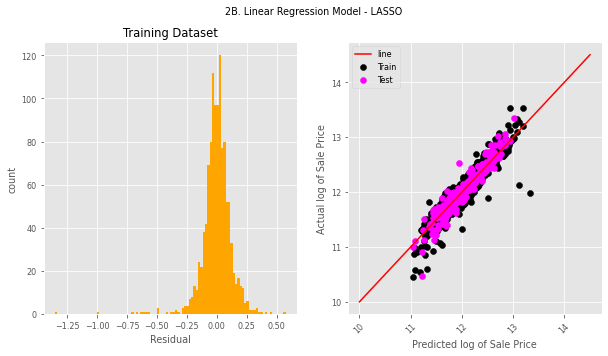

In [45]:
from sklearn.metrics import mean_squared_error
rmse_ls_train = mean_squared_error(y_train, 
                    gs.best_estimator_.predict(X_train_scaled), 
                    squared = False)
rmse_ls_test = mean_squared_error(y_test, 
                    gs.best_estimator_.predict(X_test_scaled), 
                    squared = False)
print('RMSE Logarithmic Train: ', rmse_ls_train)
print('RMSE Logarithmic Test: ', rmse_ls_test)

rmse_ls_train_conv = mean_squared_error(np.exp(y_train), 
                    np.exp(gs.best_estimator_.predict(X_train_scaled)), 
                    squared = False)
print('RMSE Train: $', rmse_ls_train_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_ls_train = y_train - gs.best_estimator_.predict(X_train_scaled)
residuals_ls_test = y_test - gs.best_estimator_.predict(X_test_scaled)

axs[0].hist(residuals_ls_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(gs.best_estimator_.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(gs.best_estimator_.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('2B. Linear Regression Model - LASSO');

In [46]:
rsqrd_train.append(r2_score(y_train, 
                 gs.best_estimator_.predict(X_train_scaled)))
rsqrd_test.append(r2_score(y_test, 
                gs.best_estimator_.predict(X_test_scaled)))
rmse_log_train.append(rmse_ls_train)
rmse_log_test.append(rmse_ls_test)
rmse_train.append(rmse_ls_train_conv)
rmse_test.append(np.nan)

In [47]:
pd.Series(gs.best_estimator_.coef_, index=PriceFeatures.columns)

LotFrontage             -0.007424
LotArea                  0.015107
MasVnrArea              -0.000000
BsmtFinSF1              -0.000000
BsmtFinSF2               0.001707
                           ...   
SaleCondition_AdjLand    0.000000
SaleCondition_Alloca    -0.000000
SaleCondition_Family    -0.000000
SaleCondition_Normal     0.046032
SaleCondition_Partial    0.000000
Length: 537, dtype: float64

In [48]:
gs.best_estimator_.intercept_

11.722186152152037

In [49]:
coefs = pd.DataFrame(
    gs.best_estimator_.coef_,
    columns=["Coefficients"],
    index=PriceFeatures.columns,
)

In [50]:
coefs['Magnitude'] = abs(coefs['Coefficients'])
coefs_sorted = coefs.sort_values('Magnitude', ascending = True)
coefs_sorted_nonzero = coefs_sorted.loc[coefs_sorted['Magnitude']>0.001]
coefs_sorted_nonzero = coefs_sorted_nonzero.drop('Magnitude', axis=1)
coefs_sorted_nonzero.head()

,Coefficients
BsmtQual_Gd,-0.001275
BsmtFinSF2,0.001707
MiscVal,0.001707
LotConfig_Inside,-0.001712
BsmtExposure_NoBsmt,-0.002722


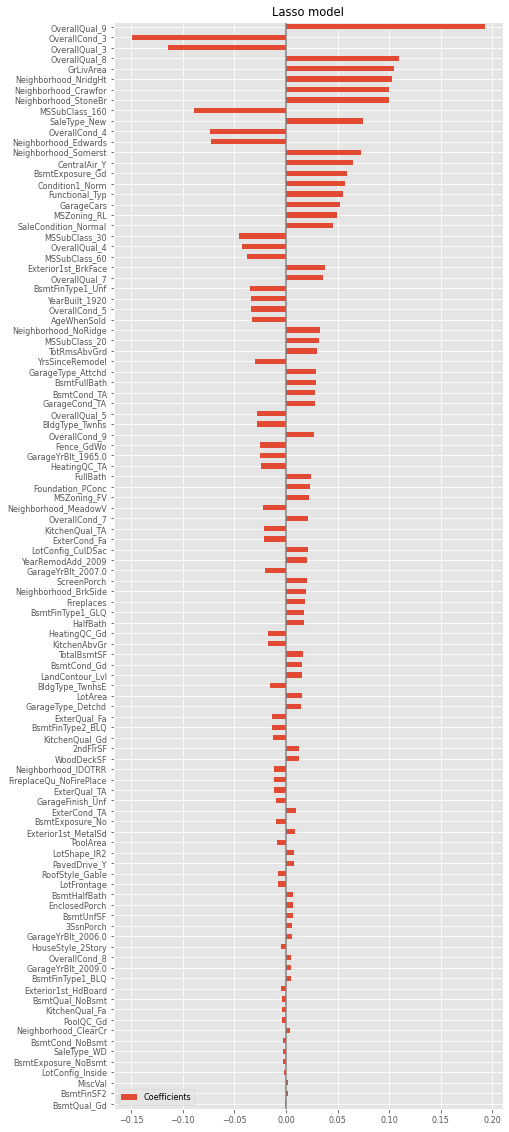

In [51]:
coefs_sorted_nonzero.plot(kind="barh", figsize=(9, 20))
plt.title("Lasso model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

# Model 3A : Random Forests - No Grid Search 

In [52]:
X_train_scaled.shape

(1162, 537)

In [53]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()

# Look at parameters used by our current forest
# print('Parameters currently in use:\n')
# randomForest.get_params()

In [54]:
randomForest.set_params(random_state=42, 
                        n_estimators=100, 
                        max_features=23)
randomForest.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features=23, random_state=42)

In [55]:
randomForest.score(X_train_scaled, y_train)

0.978073638305464

In [56]:
sorted_importance = sorted(zip(PriceFeatures, randomForest.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('GrLivArea', 0.0586714432339519),
 ('GarageArea', 0.04908789804672139),
 ('TotalBsmtSF', 0.04173762424071516),
 ('1stFlrSF', 0.04068693811354178),
 ('GarageCars', 0.03949114546583886),
 ('FireplaceQu_NoFirePlace', 0.03574721406164156),
 ('YrsSinceRemodel', 0.02879632111992256),
 ('KitchenQual_TA', 0.028047962305023696),
 ('AgeWhenSold', 0.027919246415245673),
 ('Foundation_PConc', 0.027492020464563692),
 ('FullBath', 0.024955962342261974),
 ('LotArea', 0.024359122965208764),
 ('ExterQual_TA', 0.02256150242045773),
 ('TotRmsAbvGrd', 0.02144983657236125),
 ('BsmtFinSF1', 0.0173932624826224),
 ('Fireplaces', 0.017265959951452716),
 ('2ndFlrSF', 0.017016671164467312),
 ('ExterQual_Gd', 0.016679260203937608),
 ('OverallQual_8', 0.01508410334103),
 ('OpenPorchSF', 0.014210631498280028),
 ('MasVnrArea', 0.012333721396645571),
 ('GarageType_Attchd', 0.012202787127701373),
 ('LotFrontage', 0.010784467194265365),
 ('BsmtQual_TA', 0.010036135308394622),
 ('GarageType_Detchd', 0.0094800928642868

RMSE Logarithmic Train:  0.058712119188443074
RMSE Logarithmic Test:  0.14460954856757027
RMSE Train: $ 14474.745834521009


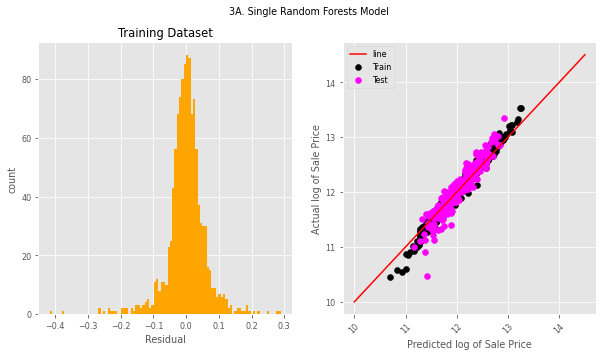

In [57]:
from sklearn.metrics import mean_squared_error
rmse_srf_train = mean_squared_error(y_train, 
            randomForest.predict(X_train_scaled), 
            squared = False)
rmse_srf_test = mean_squared_error(y_test, 
            randomForest.predict(X_test_scaled), 
            squared = False)

print('RMSE Logarithmic Train: ', rmse_srf_train)
print('RMSE Logarithmic Test: ', rmse_srf_test)

rmse_srf_train_conv = mean_squared_error(np.exp(y_train), 
            np.exp(randomForest.predict(X_train_scaled)), 
            squared = False)
print('RMSE Train: $', rmse_srf_train_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_srf_train = y_train - randomForest.predict(X_train_scaled)
residuals_srf_test = y_test - randomForest.predict(X_test_scaled)

axs[0].hist(residuals_srf_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(randomForest.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(randomForest.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('3A. Single Random Forests Model');

In [58]:
rsqrd_train.append(r2_score(y_train, 
                 randomForest.predict(X_train_scaled)))
rsqrd_test.append(r2_score(y_test, 
                randomForest.predict(X_test_scaled)))
rmse_log_train.append(rmse_srf_train)
rmse_log_test.append(rmse_srf_test)
rmse_train.append(rmse_srf_train_conv)
rmse_test.append(np.nan)

# Model 3B : Random Forests - Grid Search 

In [59]:
np.sqrt(537)

23.173260452512935

In [60]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

gs_randomForest = ensemble.RandomForestRegressor()

grid_para_forest = [{
    "n_estimators": [100, 200, 500],
    "max_features": [5, 10, 15, 20, 23, 25],
    "random_state": [42]}]
grid_search_forest = GridSearchCV(gs_randomForest, 
                                  grid_para_forest, 
                                  scoring='accuracy', 
                                  cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 418 ms, sys: 190 ms, total: 608 ms
Wall time: 12 s


/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [5, 10, 15, 20, 23, 25],
                          'n_estimators': [100, 200, 500],
                          'random_state': [42]}],
             scoring='accuracy')

In [61]:
# best parameters
grid_search_forest.best_params_

{'max_features': 5, 'n_estimators': 100, 'random_state': 42}

In [62]:
## best score
grid_search_forest.best_score_

nan

RMSE Logarithmic Train:  0.29635522448015744
RMSE Logarithmic Test:  0.32659712729439655
RMSE Train: $ 69078.72631712917


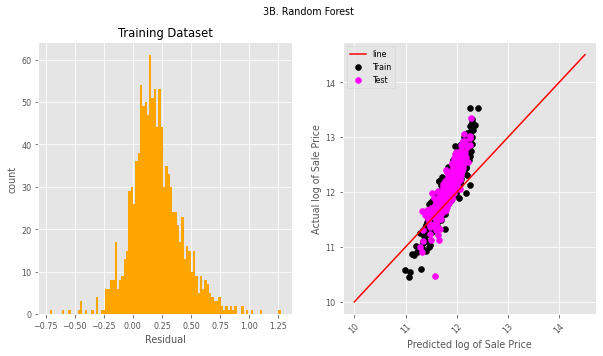

In [63]:
from sklearn.metrics import mean_squared_error
rmse_rf_train = mean_squared_error(y_train, 
    grid_search_forest.best_estimator_.predict(X_train_scaled), 
    squared = False)
rmse_rf_test = mean_squared_error(y_test, 
    grid_search_forest.best_estimator_.predict(X_test_scaled), 
    squared = False)

print('RMSE Logarithmic Train: ', rmse_rf_train)
print('RMSE Logarithmic Test: ', rmse_rf_test)

rmse_rf_train_conv = mean_squared_error(np.exp(y_train), 
    np.exp(grid_search_forest.best_estimator_.predict(X_train_scaled)), 
    squared = False)
print('RMSE Train: $', rmse_rf_train_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_rf_train = y_train - grid_search_forest.best_estimator_.predict(X_train_scaled)
residuals_rf_test = y_test - grid_search_forest.best_estimator_.predict(X_test_scaled)

axs[0].hist(residuals_rf_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(grid_search_forest.best_estimator_.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(grid_search_forest.best_estimator_.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('3B. Random Forest');

In [64]:
rsqrd_train.append(r2_score(y_train, 
    grid_search_forest.best_estimator_.predict(X_train_scaled)))
rsqrd_test.append(r2_score(y_test, 
    grid_search_forest.best_estimator_.predict(X_test_scaled)))
rmse_log_train.append(rmse_rf_train)
rmse_log_test.append(rmse_rf_test)
rmse_train.append(rmse_rf_train_conv)
rmse_test.append(np.nan)

# Model 4A : Gradient Boosting - No Grid Search

In [65]:
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [66]:
gbm.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [67]:
gbm.score(X_train_scaled, y_train)

0.9536220321926794

In [68]:
sorted_importance = sorted(zip(PriceFeatures, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('GrLivArea', 0.3269920887630399),
 ('AgeWhenSold', 0.14277909649060797),
 ('GarageCars', 0.11115216854377603),
 ('TotalBsmtSF', 0.07667998231878924),
 ('YrsSinceRemodel', 0.04002647656233678),
 ('Fireplaces', 0.032082976575381394),
 ('GarageArea', 0.025592970422358224),
 ('BsmtFinSF1', 0.02410200511609461),
 ('LotArea', 0.023022529507975415),
 ('ExterQual_TA', 0.02296041157020376),
 ('KitchenQual_TA', 0.020101790740551323),
 ('FireplaceQu_NoFirePlace', 0.01748313861962403),
 ('CentralAir_Y', 0.013600422506887836),
 ('GarageCond_TA', 0.008698053028645403),
 ('2ndFlrSF', 0.00802631367756248),
 ('1stFlrSF', 0.0076135990422957515),
 ('GarageType_Attchd', 0.006982476348467231),
 ('OverallCond_3', 0.004571859742705816),
 ('OpenPorchSF', 0.0042345296121947575),
 ('Neighborhood_Edwards', 0.004025074214201729),
 ('TotRmsAbvGrd', 0.003446386824621694),
 ('BsmtExposure_Gd', 0.0033273212447577877),
 ('MSSubClass_30', 0.003274030716119624),
 ('Functional_Typ', 0.003138613842413326),
 ('Neighborho

RMSE Logarithmic Train:  0.0853886852691925
RMSE Logarithmic Test:  0.12038085502198784
RMSE Train: $ 16183.723145985092


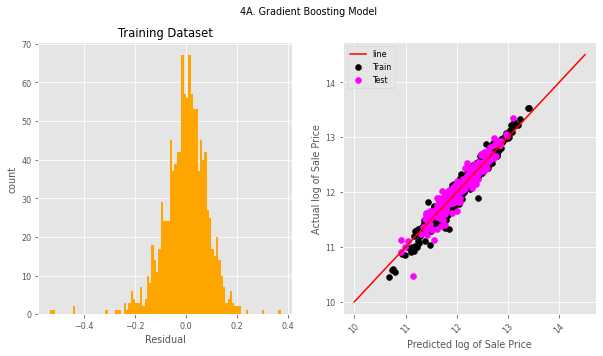

In [69]:
from sklearn.metrics import mean_squared_error
rmse_gbm_train = mean_squared_error(y_train, 
                gbm.predict(X_train_scaled), 
                squared = False)
rmse_gbm_test = mean_squared_error(y_test, 
                gbm.predict(X_test_scaled), 
                squared = False)

print('RMSE Logarithmic Train: ', rmse_gbm_train)
print('RMSE Logarithmic Test: ', rmse_gbm_test)

rmse_gbm_train_conv = mean_squared_error(np.exp(y_train), 
                np.exp(gbm.predict(X_train_scaled)), 
                squared = False)
print('RMSE Train: $', rmse_gbm_train_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_gbm_train = y_train - gbm.predict(X_train_scaled)
residuals_gbm_test = y_test - gbm.predict(X_test_scaled)
axs[0].hist(residuals_gbm_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(gbm.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(gbm.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('4A. Gradient Boosting Model');

In [70]:
rsqrd_train.append(r2_score(y_train, 
                gbm.predict(X_train_scaled)))
rsqrd_test.append(r2_score(y_test, 
                gbm.predict(X_test_scaled)))
rmse_log_train.append(rmse_gbm_train)
rmse_log_test.append(rmse_gbm_test)
rmse_train.append(rmse_gbm_train_conv)
rmse_test.append(np.nan)

In [81]:
pd.options.display.float_format = '{:,.3f}'.format
model_name = ['null','lm','ls','srf','gbm']
zipped = list(zip(rsqrd_train, rsqrd_test, 
                 rmse_log_train, rmse_log_test, 
                 rmse_train, rmse_test))

results = pd.DataFrame(zipped, columns=['r2 train',
                                       'rs2 test',
                                       'rmse log train',
                                       'rmse log test',
                                       'rmse train',
                                       'rmse test'])
results.head()

,r2 train,rs2 test,rmse log train,rmse log test,rmse train,rmse test
0,-0.000,-0.000,0.397,0.412,"80,205.228","83,041.877"
1,0.961,"-192,765,241,808,766,272.000",0.078,"181,086,892.731","16,558.457",NaN
2,0.901,0.908,0.125,0.125,"29,570.305",NaN
3,0.978,0.877,0.059,0.145,"14,474.746",NaN
4,0.441,0.373,0.296,0.327,"69,078.726",NaN


# Compare Model Results

(0.0, 150.0)

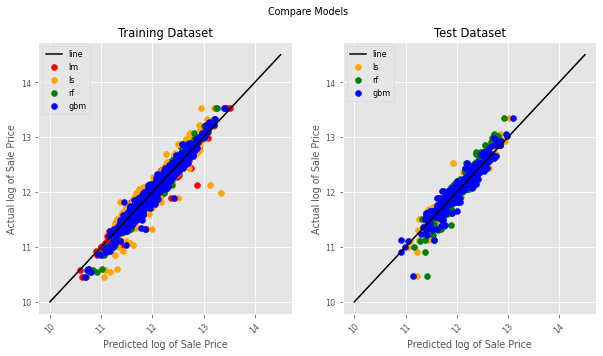

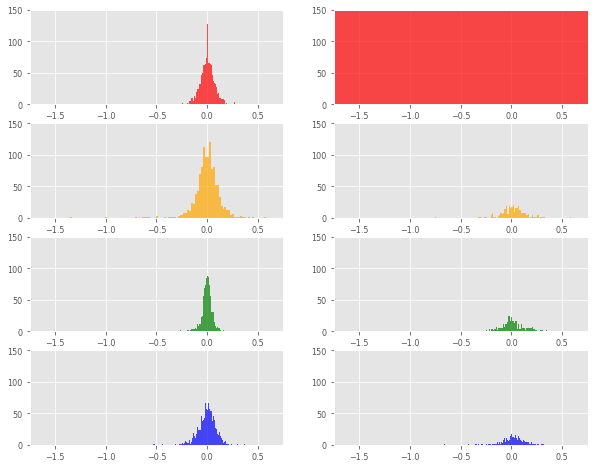

In [71]:
fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[0].plot(x,y, 'k-')
axs[0].scatter(lm.predict(X_train_scaled), 
         y_train, color='red')
axs[0].scatter(gs.best_estimator_.predict(X_train_scaled), 
         y_train, color='orange')
axs[0].scatter(randomForest.predict(X_train_scaled), 
         y_train, color='green')
axs[0].scatter(gbm.predict(X_train_scaled), 
         y_train, color='blue')
axs[0].set_ylabel('Actual log of Sale Price')
axs[0].set_xlabel('Predicted log of Sale Price')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(['line','lm','ls','rf','gbm'])
axs[0].set_title('Training Dataset')

axs[1].plot(x,y, 'k-')
#axs[1].scatter(lm.predict(X_test_scaled), 
#         y_test, color='red')
axs[1].scatter(gs.best_estimator_.predict(X_test_scaled), 
         y_test, color='orange')
axs[1].scatter(randomForest.predict(X_test_scaled), 
         y_test, color='green')
axs[1].scatter(gbm.predict(X_test_scaled), 
         y_test, color='blue')
axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','ls','rf','gbm'])
axs[1].set_title('Test Dataset')

fig.suptitle('Compare Models');

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
fig2, axs2 = plt.subplots(4,2) 
fig2.set_figheight(8)
fig2.set_figwidth(10)

axs2[0,0].hist(residuals_lm_train,bins=100, 
                    color = 'red', alpha=0.7);
axs2[0,0].set_xlim(-1.75,0.75)
axs2[0,0].set_ylim(0,150)
axs2[1,0].hist(residuals_ls_train,bins=100, 
                    color = 'orange', alpha=0.7);
axs2[1,0].set_xlim(-1.75,0.75)
axs2[1,0].set_ylim(0,150)
axs2[2,0].hist(residuals_srf_train,bins=100, 
                    color = 'green', alpha=0.7);
axs2[2,0].set_xlim(-1.75,0.75)
axs2[2,0].set_ylim(0,150)
axs2[3,0].hist(residuals_gbm_train,bins=100, 
                    color = 'blue', alpha=0.7);
axs2[3,0].set_xlim(-1.75,0.75)
axs2[3,0].set_ylim(0,150)

axs2[0,1].hist(residuals_lm_test,bins=100, 
                    color = 'red', alpha=0.7);
axs2[0,1].set_xlim(-1.75,0.75)
axs2[0,1].set_ylim(0,150)
axs2[1,1].hist(residuals_ls_test,bins=100, 
                    color = 'orange', alpha=0.7);
axs2[1,1].set_xlim(-1.75,0.75)
axs2[1,1].set_ylim(0,150)
axs2[2,1].hist(residuals_srf_test,bins=100, 
                    color = 'green', alpha=0.7);
axs2[2,1].set_xlim(-1.75,0.75)
axs2[2,1].set_ylim(0,150)
axs2[3,1].hist(residuals_gbm_test,bins=100, 
                    color = 'blue', alpha=0.7);
axs2[3,1].set_xlim(-1.75,0.75)
axs2[3,1].set_ylim(0,150)
#axs2[0].legend(['lm','ls','rf','gbm'])
#axs2[0].set_ylabel('count')
#axs2[0].set_xlabel('Residual')
#axs2[0].set_title('Training Dataset - Residuals')